In [ ]:
#from keras.datasets import mnist
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
from keras.datasets import mnist
from keras import Sequential, Input, Model
from keras.layers import Conv2D, Dense, MaxPool2D, Flatten
import keras
import tensorflow as tf
from keras.utils import np_utils
import matplotlib.pyplot as plt
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
n_classes = 2
print(Y_train.shape)
check_train = (Y_train == 0) | (Y_train == 1) 
X_train = X_train[check_train]/255.
Y_train = Y_train[check_train]
len_data = X_train.shape[0]
size = len_data
X_train = X_train[:size]/255.
Y_train = Y_train[:size]
Y_train = np_utils.to_categorical(Y_train)

(60000,)


In [ ]:
#Sử dụng genetic algoritm để khiến cho mạng neuron dùng để dự đoán nhãn 0 1 của bộ ảnh mnist dần trở nên chính xác hơn
#1) Khởi tạo 1 quần thể với các cá thể là ngẫu nhiên 
# hình dạng của cá thể : mạng neuron với các lớp cố định và các parameters là ngẫu nhiên

#2) Hàm đánh giá độ tốt của mỗi cá thể khi mà cho tương tác với môi trường
# Lấy chính accuracy -> số nhãn dự đoán đúng trên toàn bộ số nhãn 
# -> trừ đi mae -> Mean Absolutely Error -> sum np.abs(Y_predict - Y_real)
# -> hàm đánh độ tốt ( fitness) -> hàm đánh giá sự thích nghi với môi trường -> 
#hàm 1 : số nhãn dự đoán đúng chia cho số lượng toàn bộ số nhãn
#hàm 2  : (số nhãn dự đoán đúng chia cho số lượng toàn bộ số nhãn) - MAE(Y_predict, Y_real)
#3) Sau khi cho tương tác với môi trường, ta tiến hành chọn những cá thể có hàm fitness mang giá trị cao nhất
# -> bao nhiêu cá thể sẽ tự set, hoặc bao nhiêu phần trăm tổng cá thể tốt nhất sẽ được giữ lại
# -> thực hiện thêm lai tạo những cá thể tốt nhất
# -> cá thể con = lai tạo(cá thể bố, cá thể mẹ)
# hàm lai tạo sẽ có ý nghĩa nếu chứng minh được là nó sẽ làm cho cá thể con hưởng được phần tốt của bố và mẹ
# kiểu lai tạo 
# 3.1.1) tương quan chéo : [1, 2, 3, 4, 5] [6, 7, 8, 9, 10] -> [1, 2, 3, 9, 10]
# bài toán [1]
# 3.1.2) tương quan : weight_con = alpha * weight_mẹ + (1 - alpha) * weight_cha (0 < alpha < 1)-> alpha tự set
# giúp con có khả năng dự đoán được những dữ liệu mà bố với mẹ cùng dự đoán đúng chung
# có khả năng dự đoán thêm những dữ liệu bố dự đoán mà mẹ dự đoán đúng
# ... mẹ dự đoán sai mà bố dự đoán đúng
# -> thừa hưởng phần tốt, mà có khả năng làm số dữ liệu dự đoán đúng tăng lên 
# -> phép lai hợp lý về logic
# * Nếu mà bố với mẹ kiểu dự đoán được đúng những dữ liệu giống nhau và sai những dữ liệu cũng giống nhau
# -> việc mình cần làm là chọn lọc thêm nhiều cặp bố mẹ khác 
# 3.2 -> Phép đột biến
# chọn ra 1 gene bất kì -> [1, 0, 0, 0, 1, 1, 0]
# tự khởi tạo xác suất giới hạn để đột biến gene -> 0.3
# Duyệt xuống các từng bit 0, 1 của gene -> mỗi loop random ra 1 số từ 0 tới 1 -> nếu nó < 0.3 -> lật bit đấy -> k thì continue
# * Trong bài toán của chúng ta sẽ chọn ra N cá thể trong quần thể cũ 
#-> duyệt N cá thể 
#-> mỗi loop random 1 số từ 0 tới 1 -> nếu số này < 0.3 -> tạo ra 1 cá thể mới là cá thể này với bộ weight bị random lại-> nếu > 0.3 thì continue
# -> tổng kết toàn bộ cá thể cho quần thể sau trong project này = (cá thể tốt nhất được lọc ra) + (cá thể con của các cặp cá thể tốt nhất) + (cá thể được đột biến)

Episode 0
Best accuracy is : 92.1279115673115%
Worst accuracy is : 11.685748124753257%
Episode 1
Best accuracy is : 96.0757994472957%
Worst accuracy is : 41.902881958152385%
Episode 2
Best accuracy is : 97.63916304776944%
Worst accuracy is : 46.766679826292936%
Episode 3
Best accuracy is : 97.83655744176866%
Worst accuracy is : 46.766679826292936%
Episode 4
Best accuracy is : 97.8523489932886%
Worst accuracy is : 46.766679826292936%
Episode 5
Best accuracy is : 97.86024476904855%
Worst accuracy is : 46.71930517173312%
Episode 6
Best accuracy is : 97.86024476904855%
Worst accuracy is : 46.766679826292936%
Episode 7
Best accuracy is : 97.86024476904855%
Worst accuracy is : 31.133043821555468%
Episode 8
Best accuracy is : 97.86024476904855%
Worst accuracy is : 41.62652980655349%
Episode 9
Best accuracy is : 97.86024476904855%
Worst accuracy is : 46.766679826292936%


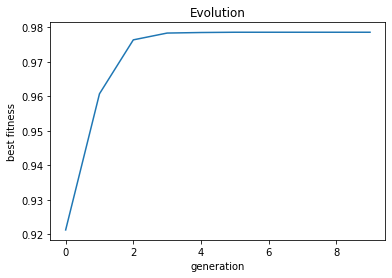

In [ ]:
#hàm đánh giá sự thích nghi của cá thể
def fitness(model, X, Y):
  with tf.device("/gpu:0"):
    Y_predict = model.predict(X)
  error = np.abs(Y_predict - Y)
  score = np.argmax(Y_predict, axis = 1) - np.argmax(Y, axis = 1)
  mae_loss = np.sum(np.sum(error, axis = 0), axis = 0)/(error.shape[0])
  accuracy = score[score == 0.].shape[0] / score.shape[0]
  return np.array([accuracy])
def cross_over(model1, model2):
  alpha = 0.4
  model_child = create_model()
  for i in range(2, len(model_child.layers)):
    weight1, bias1 = model1.layers[i].get_weights()
    weight2, bias2 = model2.layers[i].get_weights()
    model_child.layers[i].set_weights((alpha * weight1 + (1 - alpha) * weight2, alpha * bias1 + (1 - alpha) * bias2))
  return model_child
def mutation(model_mutate):
    model = keras.models.clone_model(model_mutate)
    i = 0
    while(i < 2):
      i = int(np.random.rand() * len(model.layers))
    layer_weight, layer_bias = model.layers[i].get_weights()
    model.layers[i].set_weights((tf.convert_to_tensor(np.random.rand(layer_weight.shape[0], layer_weight.shape[1])), tf.convert_to_tensor(np.random.rand(layer_bias.shape[0]))))
    return model
def create_model():
  input = Input((28, 28))
  flatten = Flatten()(input)
  dense1 = Dense(128)(flatten)
  output = Dense(n_classes, activation = "softmax")(dense1)
  return Model(input, output)
bots_length = 100
loop = 10
bots = np.array([create_model() for i in range(bots_length)])
n_mutation = 10
n_selection = 10
save_fitness = []
for episode in range(loop):
  print("Episode {}".format(episode))
  bots_fitness = np.array([fitness(bot, X_train, Y_train) for bot in bots])
  ranking_fitness = np.argsort(bots_fitness[:, 0])[::-1]
  print("Best accuracy is : {}%".format(bots_fitness[ranking_fitness[0], 0] * 100.))
  save_fitness.append(bots_fitness[ranking_fitness[0], 0])
  print("Worst accuracy is : {}%".format(bots_fitness[ranking_fitness[-1], 0] * 100.))
  top_bots = ranking_fitness[:n_selection]
  bots_top = bots[top_bots]
  bots_crossover1 = np.array([cross_over(bots_top[j], bots_top[i]) 
                              for i in range(bots_top.shape[0] - 1) 
                              for j in range(i + 1, bots_top.shape[0])]).reshape(-1)
  index_mutate = np.random.permutation(bots.shape[0])[:n_mutation].astype(int)
  bots_mutate = np.array([mutation(bot) for bot in bots[index_mutate]])
  bots = np.concatenate((bots_top, bots_crossover1))
  bots = np.concatenate((bots, bots_mutate))
  bots = np.concatenate((bots, np.full((10), create_model())))
plt.plot(save_fitness)
plt.title("Evolution")
plt.ylabel('best fitness')
plt.xlabel('generation')
plt.show()

In [ ]:
index_boss = np.argsort(bots_fitness)[-1]
boss = bots[index_boss]
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
check_test = (Y_test == 0) | (Y_test == 1) 
X_test = X_test[check_test]/255.
Y_test = Y_test[check_test]
len_data = X_test.shape[0]
X_test = X_test[:size]/255.
Y_test = Y_test[:size]
Y_test = np_utils.to_categorical(Y_test)
Y_predict = boss[0].predict(X_test)
score =  score = np.argmax(Y_predict, axis = 1) - np.argmax(Y_test, axis = 1)
accuracy = score[score == 0.].shape[0] / score.shape[0]
print("Test accuracy is {}".format(accuracy * 100))

Test accuracy is 98.53427895981088


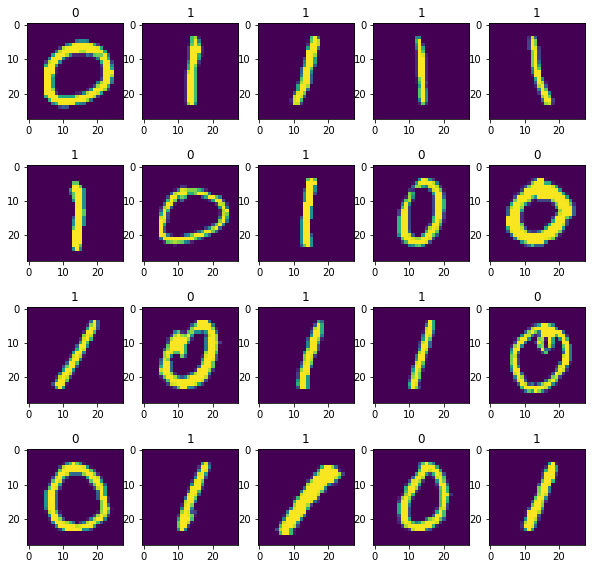

In [ ]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
n_display = 20
check_train = (Y_train == 0) | (Y_train == 1)
X_train = X_train[check_train]
X_train = X_train[:size]/255.
random = np.random.permutation(X_train.shape[0])[:n_display].astype(int)
img_display = X_train[random]
fig = plt.figure(figsize = (10, 10))
for i in range(1, n_display + 1):
    fig.add_subplot(4, 5, i)
    img = img_display[i - 1].copy()
    plt.imshow(img)
    img = img.reshape(1, img.shape[0], img.shape[1])
    plt.title(np.argmax(boss[0].predict(img), axis = 1)[0])
plt.show()